### import python libraries


In [17]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### import csv file

In [18]:

df = pd.read_csv('Diwali Sales Data.csv', encoding= 'unicode_escape')


In [19]:
df.shape


(11251, 15)

In [20]:
df.head()


,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [21]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [22]:
#drop unrelated/blank columns
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)


In [23]:
#check for null values
pd.isnull(df).sum()


User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [24]:
# drop null values
df.dropna(inplace=True)


In [25]:
df.shape


(11239, 13)

In [26]:
# change data type
df['Amount'] = df['Amount'].astype('int')


In [27]:
df['Amount'].dtypes


dtype('int64')

In [28]:
df.columns


Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [29]:
#rename column
df.rename(columns= {'Marital_Status':'Shaadi'})


,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Shaadi,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [31]:
# use describe() for specific columns
df[['Age', 'Orders', 'Amount']].describe()


,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis

### Gender

#### 1. Create a Bar Chart Showing the Count of Male and Female Customers

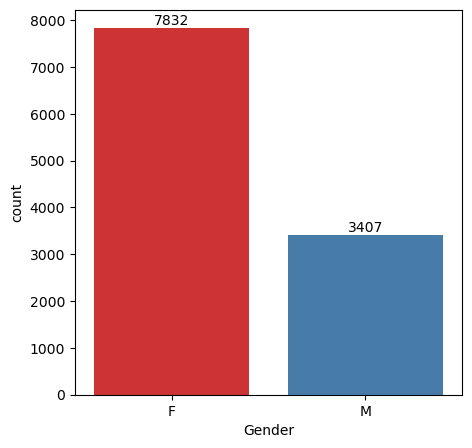

In [32]:
# plotting a bar chart for Gender and it's count
plt.figure(figsize=(5, 5))
ax = sns.countplot(x = 'Gender',data = df, palette='Set1')

for bars in ax.containers:
    ax.bar_label(bars)
plt.show()


### 2. Plot a Styled Bar Chart Showing Gender Distribution in Diwali Sales

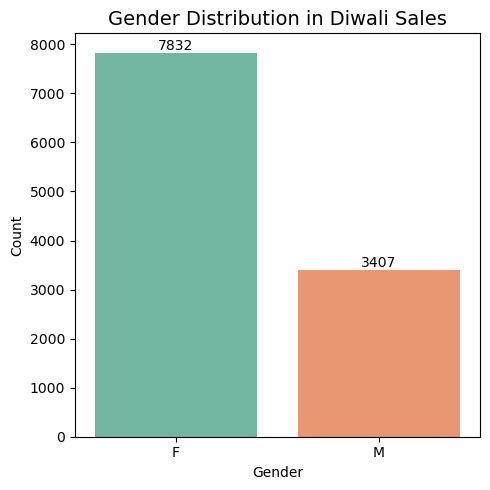

In [33]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x='Gender', data=df, palette='Set2')

for bars in ax.containers:
    ax.bar_label(bars)

plt.title('Gender Distribution in Diwali Sales', fontsize=14)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


###  3. Create a Bar Chart to Show Total Purchase Amount by Gender

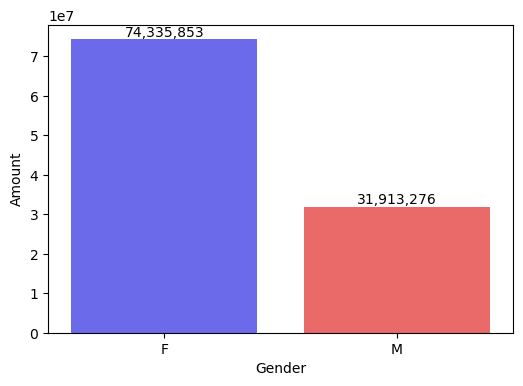

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))

# Grouping Gender-wise sales
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

# Assign the plot to ax
ax = sns.barplot(x='Gender', y='Amount', data=sales_gen, palette='seismic')

# Add comma-formatted value labels
for bars in ax.containers:
    labels = [f'{int(bar.get_height()):,}' for bar in bars]
    ax.bar_label(bars, labels=labels)

plt.show()


*From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men*

### 4. Visualize Customer Count by Age Group and Gender Using a Grouped Bar Chart

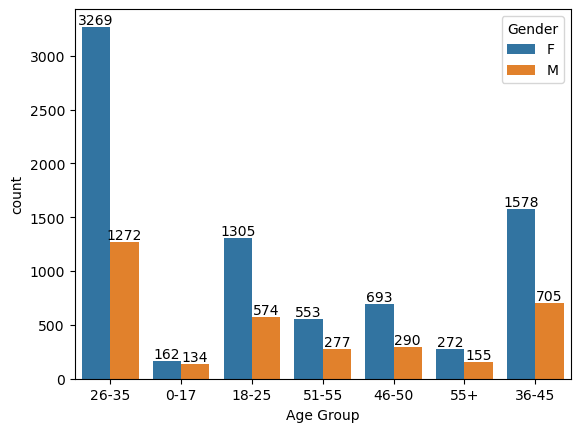

In [35]:
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)
plt.show()


### 5. Create a Bar Chart to Show Total Purchase Amount by Age Group

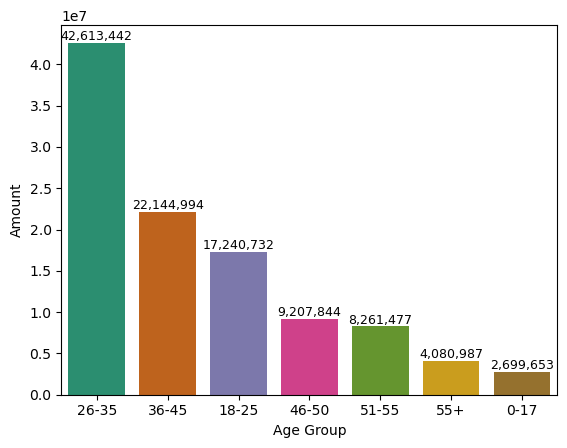

In [36]:
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

ax = sns.barplot(x='Age Group', y='Amount', data=sales_age, palette='Dark2')

# Format bar labels with commas and set smaller font size (e.g., 9)
for bars in ax.containers:
    labels = [f'{int(bar.get_height()):,}' for bar in bars]
    ax.bar_label(bars, labels=labels, fontsize=9)  # 👈 adjust size here

plt.show()


 ### 6. Visualize the Top 10 States with the Highest Number of Orders

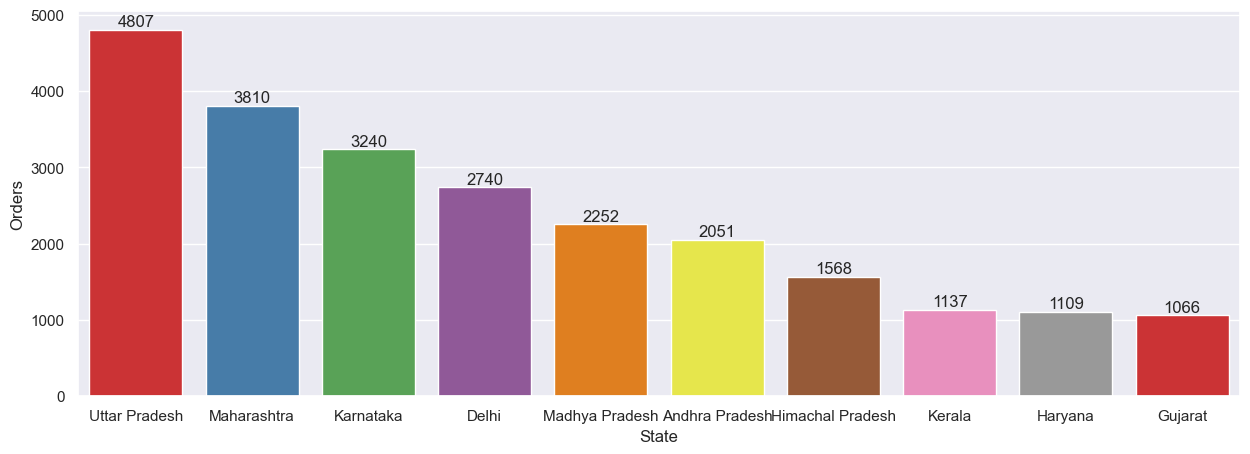

In [37]:
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
ax = sns.barplot(data=sales_state, x='State', y='Orders', palette='Set1')

for bars in ax.containers:
    ax.bar_label(bars)
plt.show()


### 7. Plot the Total Sales (Amount) from the Top 10 States

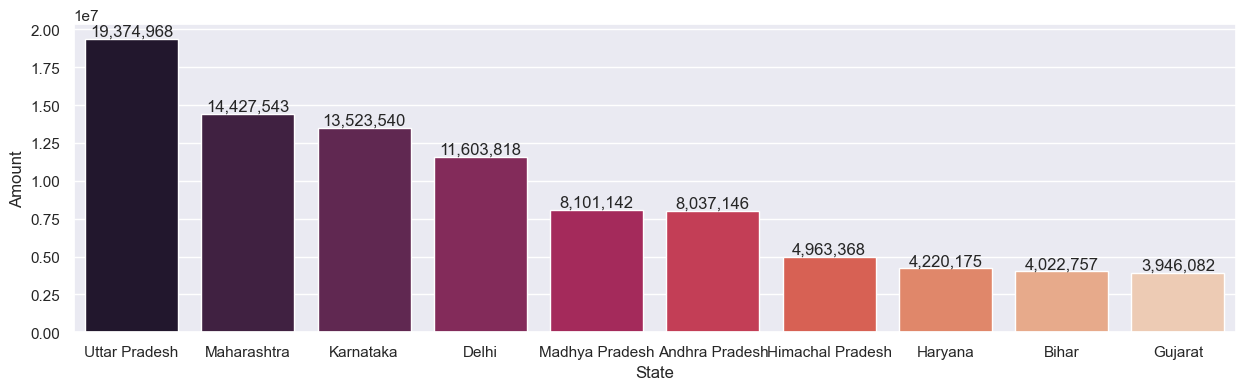

In [50]:
sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize': (15, 4)})
ax = sns.barplot(data=sales_state, x='State', y='Amount', palette='rocket')

# Add labels with comma formatting
for bars in ax.containers:
    labels = [f'{int(bar.get_height()):,}' for bar in bars]
    ax.bar_label(bars, labels=labels)

plt.show()


*From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively*


### Marital Status

### 8. Create a Bar Chart to Show Customer Count by Marital Status

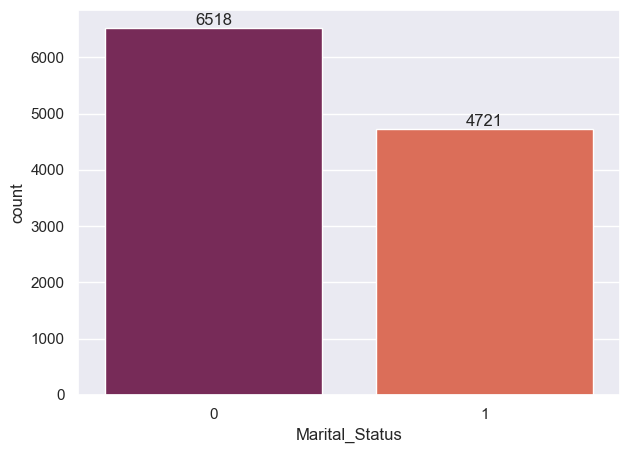

In [39]:
sns.set(rc={'figure.figsize': (7, 5)})
ax = sns.countplot(data=df, x='Marital_Status', palette='rocket')

for bars in ax.containers:
    ax.bar_label(bars)

plt.show()


### 9. Compare Total Sales by Marital Status and Gender Using a Grouped Bar Chart

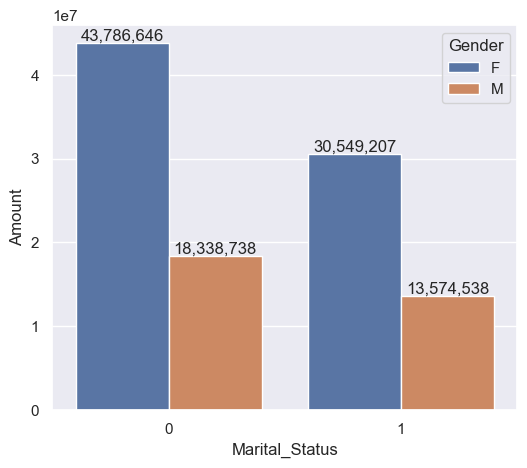

In [40]:
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize': (6, 5)})
ax = sns.barplot(data=sales_state, x='Marital_Status', y='Amount', hue='Gender')

# Format value labels with commas
for bars in ax.containers:
    labels = [f'{int(bar.get_height()):,}' for bar in bars]
    ax.bar_label(bars, labels=labels)

plt.show()


### Occupation

###  10. Plot a Bar Chart Showing the Number of Customers by Occupation

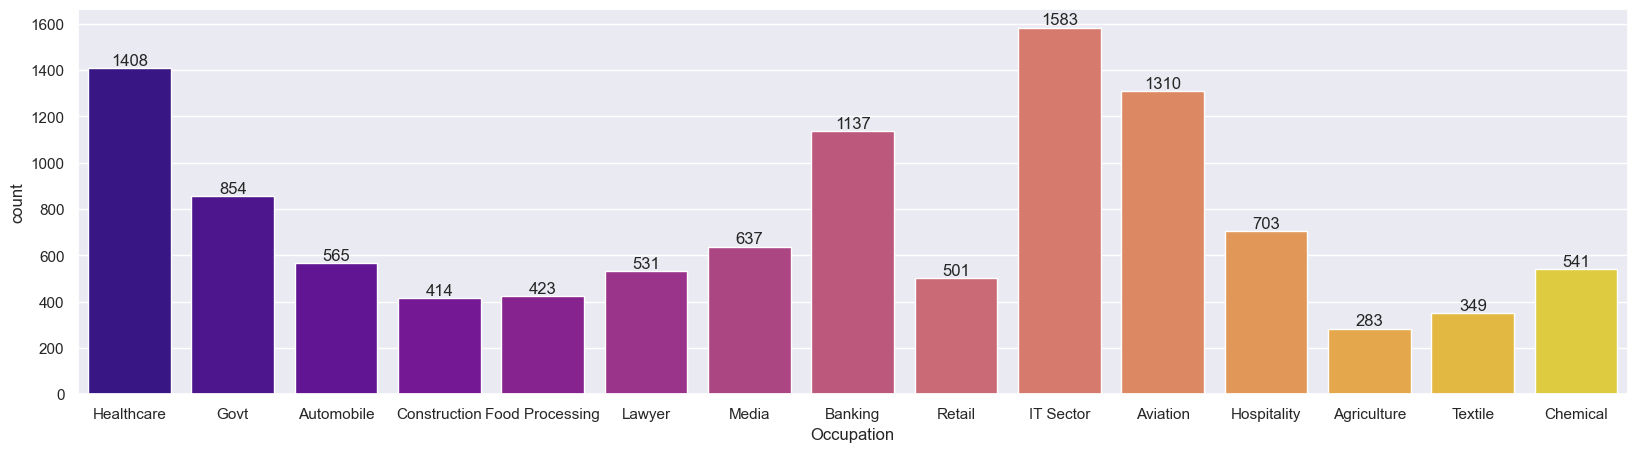

In [41]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Occupation',palette='plasma')

for bars in ax.containers:
    ax.bar_label(bars)
plt.show()


###  11. Plot Total Sales by Customer Occupation

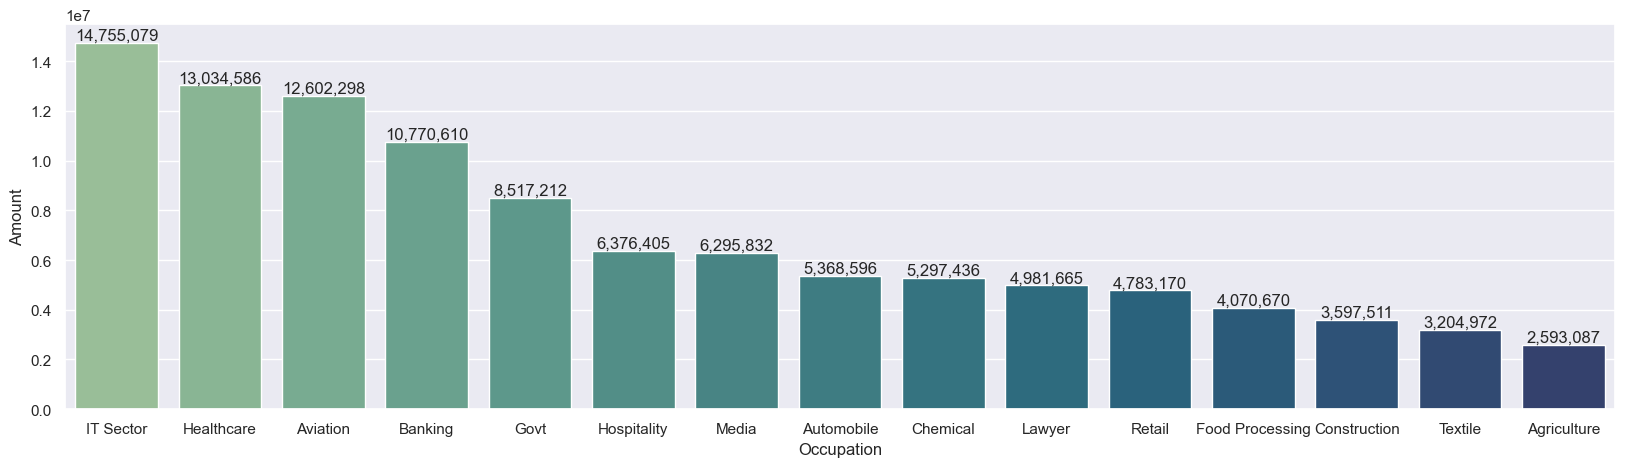

In [42]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize': (20, 5)})
ax = sns.barplot(data=sales_state, x='Occupation', y='Amount', palette='crest')

# Format labels with commas (e.g., 1,234,567)
for bars in ax.containers:
    labels = [f'{int(bar.get_height()):,}' for bar in bars]
    ax.bar_label(bars, labels=labels)

plt.show()


### Product Category

###  12. Plot a Bar Chart Showing the Number of Orders by Product Category

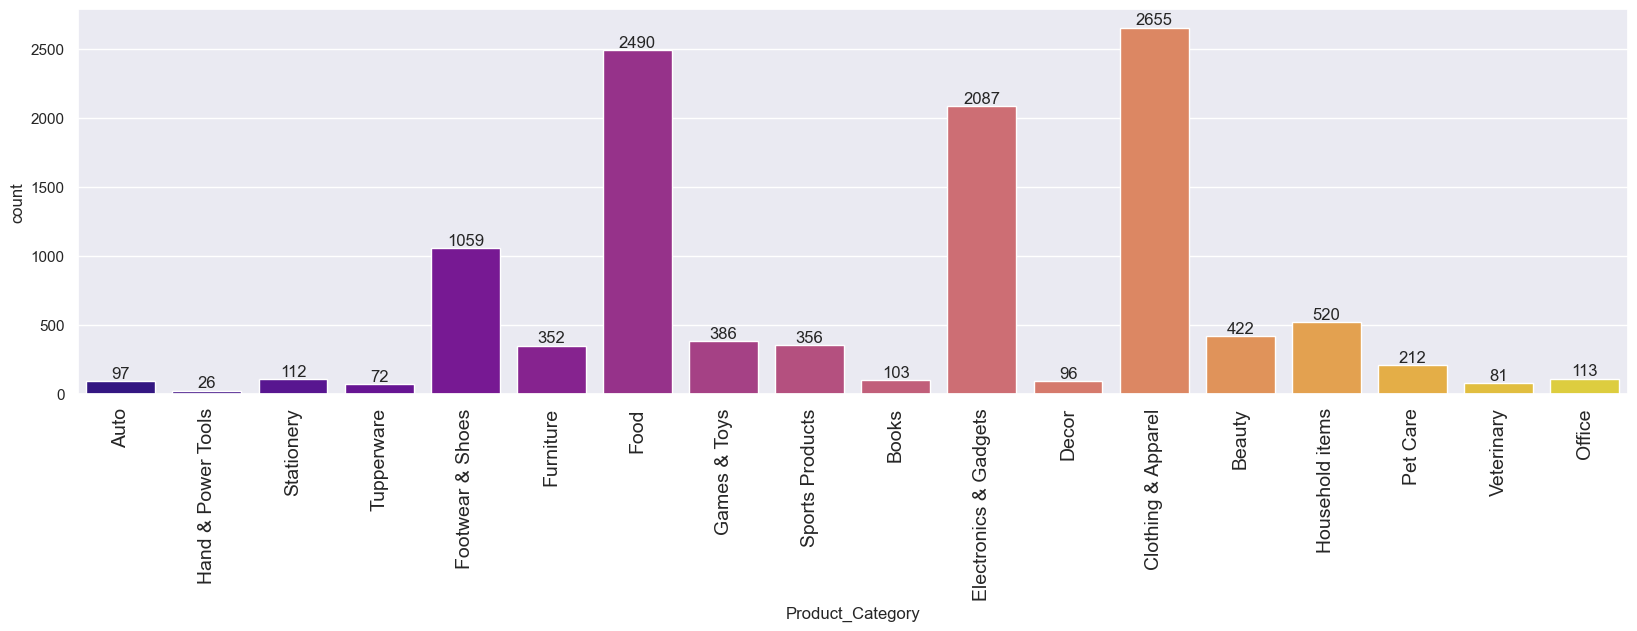

In [43]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Product_Category', palette='plasma')

for bars in ax.containers:
    ax.bar_label(bars)
    
plt.xticks(rotation=90, fontsize=14)    
plt.show()


### 13. Plot Total Sales for the Top 10 Product Categories

In [49]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
print(sales_state)

         Product_Category    Amount
6                    Food  33933883
3      Clothing & Apparel  16495019
5   Electronics & Gadgets  15643846
7        Footwear & Shoes  15575209
8               Furniture   5440051
9            Games & Toys   4331694
14        Sports Products   3635933
1                  Beauty   1959484
0                    Auto   1958609
15             Stationery   1676051


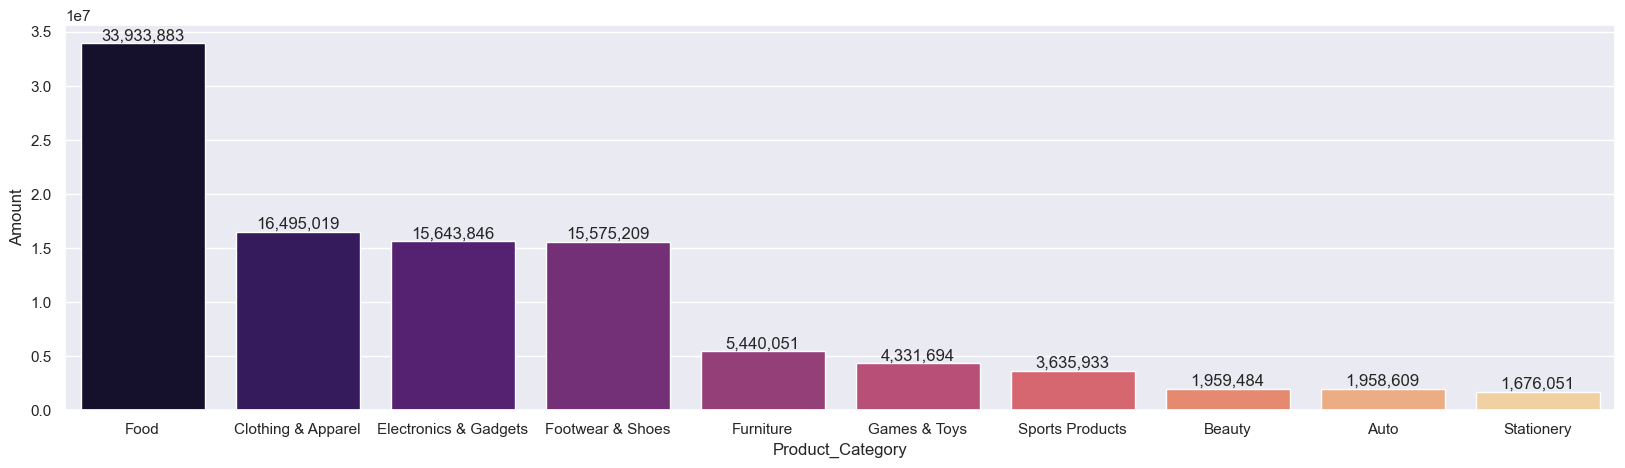

In [44]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize': (20, 5)})
ax = sns.barplot(data=sales_state, x='Product_Category', y='Amount', palette='magma')

# Format labels with commas
for bars in ax.containers:
    labels = [f'{int(bar.get_height()):,}' for bar in bars]
    ax.bar_label(bars, labels=labels)

plt.show()


## 14. Plot the Top 10 Most Ordered Products

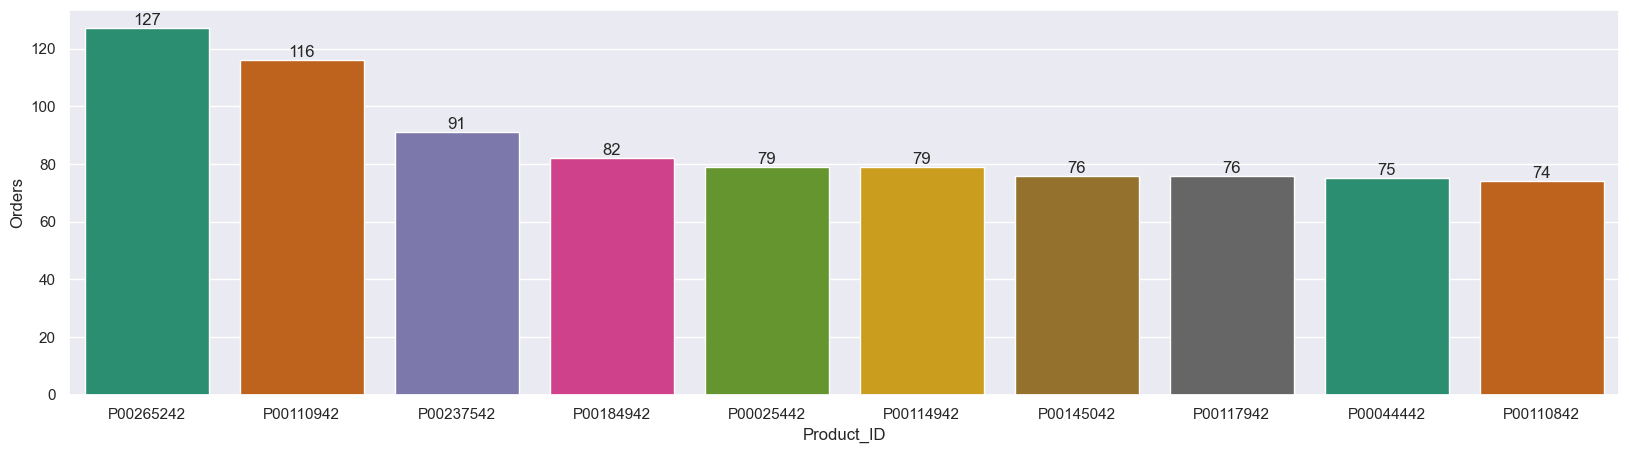

In [45]:
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize': (20, 5)})
ax = sns.barplot(data=sales_state, x='Product_ID', y='Orders', palette='Dark2')

for bars in ax.containers:
    ax.bar_label(bars)

plt.show()


### 15. Plot a Customized Bar Chart for the Top 10 Most Sold Products Using Matplotlib

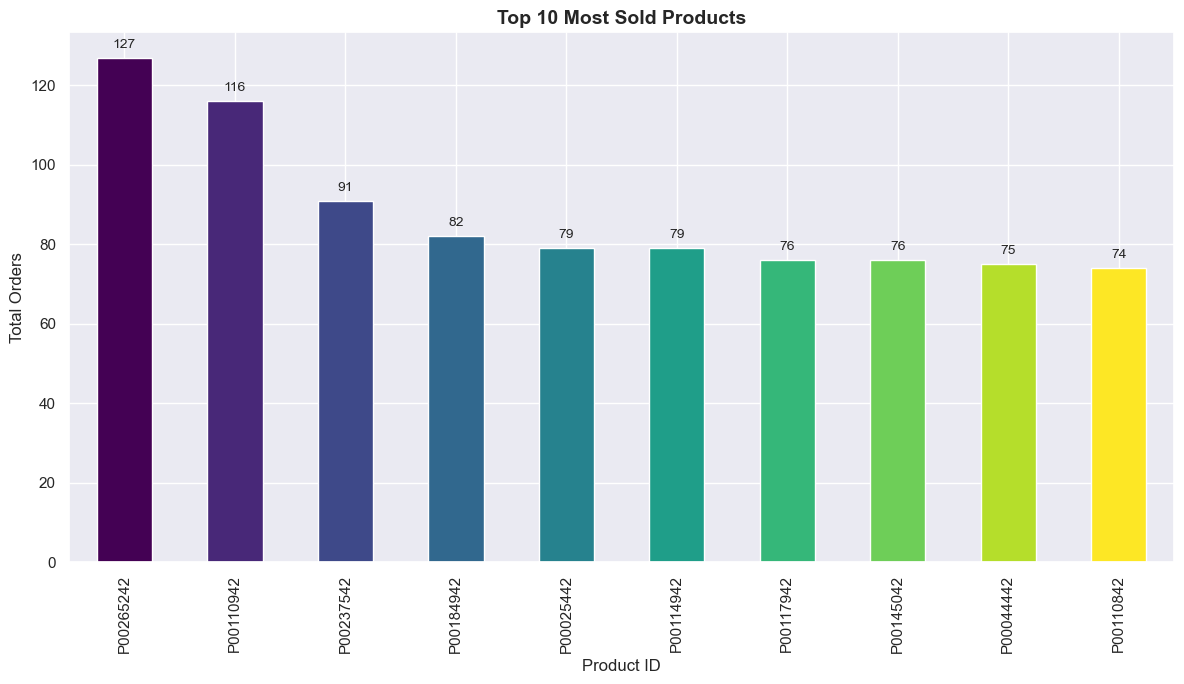

In [46]:
# top 10 most sold products (same thing as above)
import numpy as np
import matplotlib.pyplot as plt

fig1, ax1 = plt.subplots(figsize=(12, 7))

# Group and get top 10 products
top_products = df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False)

# Bar colors
bar_colors = plt.cm.viridis(np.linspace(0, 1, len(top_products)))

# Plot the bar chart
top_products.plot(kind='bar', color=bar_colors, ax=ax1)

# Add labels on top of each bar
for bar in ax1.patches:
    height = bar.get_height()
    ax1.annotate(f'{int(height)}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 5),
                 textcoords='offset points',
                 ha='center', va='bottom',
                 fontsize=10)

# Titles and labels
ax1.set_title('Top 10 Most Sold Products', fontsize=14, weight='bold')
ax1.set_xlabel('Product ID')
ax1.set_ylabel('Total Orders')

plt.tight_layout()
plt.show()

